<a href="https://colab.research.google.com/github/saranyaguhanathan/community/blob/main/Assignment_7_Salary_Discrimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head(10)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.shape

(52, 6)

In [ ]:
df.drop_duplicates()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.shape

(52, 6)

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
# outlier detection IQR
iqr=df['Year'].quantile(0.75)-df['Year'].quantile(0.25)
upper_thershold=df['Year'].quantile(0.75)+(1.5*iqr)
lower_thershold=df['Year'].quantile(0.25)-(1.5*iqr)
upper_thershold,lower_thershold

(23.0, -9.0)

In [ ]:
# outlier detection IQR
iqr=df['YSdeg'].quantile(0.75)-df['YSdeg'].quantile(0.25)
upper_thershold=df['YSdeg'].quantile(0.75)+(1.5*iqr)
lower_thershold=df['YSdeg'].quantile(0.25)-(1.5*iqr)
upper_thershold,lower_thershold

(48.0, -18.0)

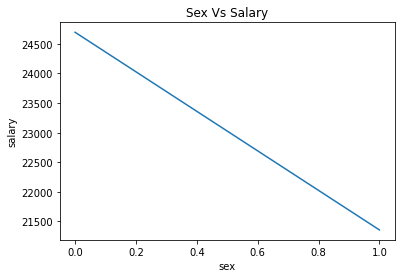

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
#EDA
# Sex 	Rank 	Year 	Degree 	YSdeg 	Salary
df.groupby('Sex')['Salary'].mean().plot()
#df.plot(x='Sex',y='Salary',style='o')
plt.title("Sex Vs Salary")
plt.xlabel("sex")
plt.ylabel("salary")
plt.show()
df[['Sex','Salary']].corr()


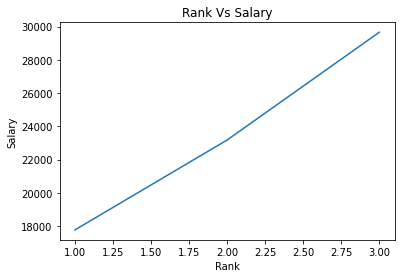

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
# Sex 	Rank 	Year 	Degree 	YSdeg 	Salary
df.groupby('Rank')['Salary'].mean().plot()
#df.plot(x='Rank',y='Salary',style='o')
plt.title("Rank Vs Salary")
plt.xlabel("Rank")
plt.ylabel("Salary")
plt.show()
df[['Rank','Salary']].corr()


In [ ]:
# There is linear reltionship between ank and salarly, no transformationrequired, 
# so we go head with applying linear regression model 

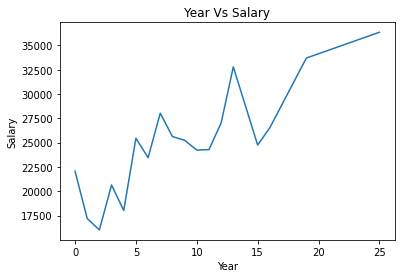

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
# Sex 	Rank 	Year 	Degree 	YSdeg 	Salary
df.groupby('Year')['Salary'].mean().plot()
#df.plot(x='Year',y='Salary',style='o')
plt.title("Year Vs Salary")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.show()
df[['Year','Salary']].corr()


In [ ]:
# There is linear reltionship between year and salarly, no transformationrequired, 
# so we go head with applying linear regression model 

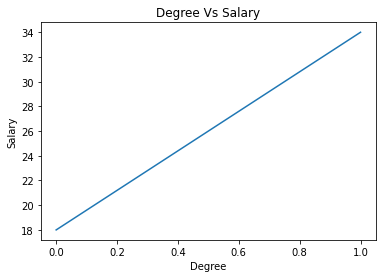

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
# Sex 	Rank 	Year 	Degree 	YSdeg 	Salary
df.groupby('Degree')['Salary'].count().plot()
#df.plot(x='Degree',y='Salary',style='o')
plt.title("Degree Vs Salary")
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.show()
df[['Degree','Salary']].corr()


no linear relationship between degree and salary... 
As degree is a categorical data no use in doing transfrmation

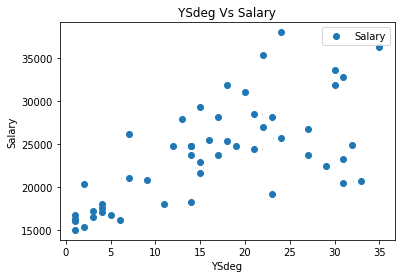

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
# Sex 	Rank 	Year 	Degree 	YSdeg 	Salary
#df.groupby('YSDeg')['Salary'].mean().plot()
df.plot(x='YSdeg',y='Salary',style='o')
plt.title("YSdeg Vs Salary")
plt.xlabel("YSdeg")
plt.ylabel("Salary")
plt.show()
df[['YSdeg','Salary']].corr()


In [ ]:
# there is a linear relationship between YSdeg and salary, so no transformation needed, we can go ahead and apply linear regression model


In [ ]:
# Model
# Sex 	Rank 	Year 	Degree 	YSdeg 	Salary
X=df.loc[:,['Sex','Rank','Degree','Year','YSdeg']].values # array of features
y=df.loc[:,'Salary'].values # Array of targets

In [ ]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# sclaling the data
from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,['Sex','Rank','Degree','Year','YSdeg'],columns=["coefficient"])
y_pred=regressor.predict(X_test_scaled)
coeff_df

,coefficient
Sex,305.200463
Rank,5040.420669
Degree,-847.061709
Year,1997.320432
YSdeg,-1086.117917


In [ ]:
import numpy as np
regressor.predict(scaler.transform(np.array([[1,3,24,1,34]])))

array([-16447.09134836])

In [ ]:
regressor.intercept_ # c


23867.128205128207

In [ ]:
# Linear equation 
# predicted salary(y)= (sex)*305 + (rank)* 5040 + (degree) * -847 + (year) * 1997 + YSdeg * -1086.11 + 23867.128

In [ ]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1

,Actual,Predicted
0,16244,15878.923883
1,36350,34135.114860
2,27025,30181.258683
3,20525,23186.813376
4,21600,20555.152460
5,22450,23302.910250
6,24450,29570.963077
7,20300,16066.232282
8,31114,30834.798352
9,28516,31980.157958


In [ ]:
from sklearn import metrics
print("R2_Score:",metrics.r2_score(y_test,y_pred))

R2_Score: 0.8096648907142319
